<a href="https://colab.research.google.com/github/Liaisan829/hotel_reviews/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт
Импортируем необходимые для работы библиотеки

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=f461879176223943ffc08e1d5fca872b4de9348bedd29c7ebfd6009d2133f7db
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline
import seaborn as sns
from datetime import datetime

import chart_studio.plotly as py

py.sign_in('rabird', 'QZh7jQZr3Yc6FMmUdSSS')

from plotly.graph_objs import *

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score, roc_curve, RocCurveDisplay
from sklearn.cluster import KMeans

# Получение данных 
Получим csv-файл с нашими данными из Google Drive.

In [ ]:
drive.mount("/content/drive")
dataset = pd.read_csv('/content/Datafiniti_Hotel_Reviews.csv', on_bad_lines='skip', engine='python')

# from google.colab import files
# uploaded = files.upload()
# for fn in uploaded.keys():
#    print('User uploaded file «{name}» with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Mounted at /content/drive


FileNotFoundError: ignored

In [ ]:
# dataset = pd.read_csv('Datafiniti_Hotel_Reviews.csv', engine='python', error_bad_lines=False)

# Описание, анализ и исправление данных
## Описание
Рассмотрим полученные данные

In [ ]:
dataset.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


## Описание полей

In [ ]:
dataset.info()

В датасете имеются следующие поля:
1. id - текстовый идентификатор. На 10 000 записей лишь 1800 уникальных значений. Исходя из дальнейших данных, можно предположить, что это идентификатор компании
2. dateAdded - дата и время, когда компания была добавлена в базу данных
3. dateUpdated - дата и время, когда информацию о компании обновляли
4. address - почтовый адрес компании, текст
5. categories - список ключевых слов к данной компании в виде текста
6. primaryCategories - список категорий, к которым относится данная компания. Всего их 6: <br> 
<ul>
  <li>Accommodation & Food Services </li> 
  <li>Arts Entertainment & Recreation</li>
   <li>Healthcare & Social Assistance, Accommodation & Food Services</li>
  <li>Wholesale Trade, Accommodation & Food Services</li>
  <li>Accommodation & Food Services, Arts Entertainment & Recreation</li>
  <li>Utilities</li>
</ul>
7. city - город, в котором расположена компания, текст
8. country - код страны, в которой находится компания, текст
9. keys - ещё один идентификатор, состоящий из страны, субъекта, города, почтового адреса и случайного числа
10. latitude - широта, double
11. longitude - долгота, double
12. name - текстовое название компании
13. postalCode - численный почтовый код
14. province - провинция / штат / субъект, в котором находится компания
15. reviews.date - дата создания отзыва          
16. reviews.dateSeen - даты, когда отзыв просмотрели      
17. reviews.rating - числовая оценка компании в отзыве          
18. reviews.sourceURLs -  URL отзыва
19. reviews.text - текст отзыва          
20. reviews.title - заголовок отзыва, текст        
21. reviews.userCity - город пользователя, оставившего отзыв, текст        
22. reviews.userProvince - субъект / провинция / штат пользователя, текст    
23. reviews.username - имя пользователя, текст        
24. sourceURLs -  URL, с которого взят отель            
25. websites - сайты отелей              


# Исправление данных
## Пропущенные значения
Обработка пустых строк


In [ ]:
print(dataset.isnull().sum())

Поля, содержащие информацию о местоположении пользователя (reviews.userCity и reviews.userProvince) содержат много пропусков. Но так как эти данные могут понадобиться при анализе отзывов, создадим после 2 датасета: со всеми записями и без разреженных полей и с частью записей, но с данными полями.

## Уникальность


In [ ]:
dataset.nunique()

Поля country и primaryCategories принимают мало значений(1 и 6 соот-но), рассмотрим эти значения. 

In [ ]:
print('country', dataset['country'].unique())
print('primaryCategories', dataset['primaryCategories'].unique())

Колонку country нужно убрать, так как она не даёт никакой информации. Категории же можно оставить для дальнейшего анализа

In [ ]:
ds = dataset.copy();
ds.drop(columns=['country'], inplace=True);
ds.head(3)

## Дубликаты
Проверим, есть ли в датасете дубликаты

In [ ]:
ds.duplicated(subset=ds.columns.drop(["reviews.date", "reviews.dateSeen", "reviews.sourceURLs"])).sum()

## Стандартизация данных

В исходном датасете даты представлены в формате ISO 8601 в формате UTC. Преобразуем в более читаемый вариант и уберём смещение по времени.

Также явно укажем числовые поля.

In [ ]:
#change 'dateAdded' format to date
ds["dateAdded"] = ds["dateAdded"].astype("datetime64")
ds['dateAdded'].apply(lambda x : x.toordinal())

#change 'dateUpdated' format to date
ds["dateUpdated"] = ds["dateUpdated"].astype("datetime64")
ds['dateUpdated'].apply(lambda x : x.toordinal())

#change 'latitude' format to float
ds["latitude"] = ds["latitude"].astype("float")

#change 'longitude' format to float
ds["longitude"] = ds["longitude"].astype("float")

#change 'reviews.date' format to date
ds["reviews.date"] = ds["reviews.date"].astype("datetime64")
ds['reviews.date'].apply(lambda x : x.toordinal)

#change 'reviews.rating' format to float
ds["reviews.rating"] = ds["reviews.rating"].astype("float")

ds['dateAdded'].head()

Для удобства работы в дальнейшем добавим колонки - количество секунд для данных дат

In [ ]:
ds['dateUpdated_int'] = ds['dateUpdated'].astype(int)
ds['dateAdded_int'] = ds['dateAdded'].astype(int)
ds['reviews.date_int'] = ds['reviews.date'].astype(int)

ds['dateUpdated_int'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



0    1536613587000000000
1    1536613587000000000
2    1536613587000000000
3    1536613576000000000
4    1536613576000000000
Name: dateUpdated_int, dtype: int64

Для категориальных данных также добавим закодированные численные колонки

In [ ]:
ds.info()

# Разбиение датасета


Разобьём преобразованные данные на 2 сета:

1) entries - набор, содержащий наибольшее количество данных для наиболее точного анализа. Колонки reviews.userCity и reviews.userProvince содержат много пропусков - удалим.

2) reviews - набор, содержащий меньшее количество данных, но при этом захватывающий колонки reviews.userCity и reviews.userProvince. На его основании можно будет сделать выводы и по ним.


In [ ]:
entries = ds.copy();
entries = entries.drop(columns=['reviews.userCity', 'reviews.userProvince'])
entries = entries.dropna(thresh=(len(entries.columns)));
print(entries.info())

print('<--------------------------------------------------------------------->')

print(entries.shape)

In [ ]:
reviews = ds.copy().dropna(thresh=(len(ds.columns)));
print(reviews.info())

print('<--------------------------------------------------------------------->')

print(reviews.shape)

# Визуальный анализ данных

Проверка актуальности данных

Оценим качество и актуальность данных с помощью гистограм на основании дат добавления (dateAdded) и последнего обновления (dateUpdated) соответственно.



In [ ]:
datesAdded = entries.copy().drop_duplicates(subset = ["name"]).groupby([entries["dateAdded"].dt.year, entries["dateAdded"].dt.month]).count();
datesAddedY = datesAdded.id.values;
datesAddedX = [(str(i[0]) + ':' + str(i[1])) for i in datesAdded.index.values];

data_quality = px.bar(x=datesAddedX, y=datesAddedY, labels={'x':'Дата', 'y':'Количество новых записей'})
data_quality.update_layout(
    margin=dict(l=0, r=30, t=30, b=0),
    title="Гистограмма количества добавленных сайтов за месяц",
    xaxis_title="Время",
    yaxis_title="Новые записи",
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="green"
    )

data_quality.show();

In [ ]:
datesUpdated = entries.copy().drop_duplicates(subset = ["name"]).groupby([entries["dateUpdated"].dt.year, entries["dateUpdated"].dt.month]).count();
datesUpdatedY = datesUpdated.id.values;
datesUpdatedX = [(str(i[0]) + ':' + str(i[1])) for i in datesUpdated.index.values];

data_relevance = px.bar(x=datesUpdatedX, y=datesUpdatedY, labels={'x':'Дата', 'y':'Количество обновлённых записей'})
data_relevance.update_layout(
    margin=dict(l=0, r=30, t=30, b=0),
    title="Гистограмма количества обновлённых сайтов за месяц",
    xaxis_title="Время",
    yaxis_title="Обновлённые записи записи",
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="green"
    )

data_relevance.show();

**Микровывод**: Как мы можем заметить, многие компании наблюдаются уже не первый год.

В целом видно, что информация обновляется достаточно часто. Но датасет не самый свежий (соревнование давно закончилось), поэтому скажем, что его стоило бы обновить для более точного анализа.


**Анализ компаний по главным критериям**

Посмотрим, какие категории у нас имеются и в каком соотношении они представляют датасет

In [ ]:
primaryCategories = entries.copy().drop_duplicates(subset = ["name"]).groupby([entries["primaryCategories"]]).count();
primaryCategoriesValues = primaryCategories.id.values;
primaryCategoriesNames = primaryCategories.index;

data_primary_categories = go.Figure(
    data=[go.Pie(labels=primaryCategoriesNames, values=primaryCategoriesValues, hole=.3)]
    );
data_primary_categories.update_layout(
    margin=dict(l=0, r=30, t=30, b=0),
    title="Диаграмма главных категорий компаний",
    title_font_family="Times New Roman",
    title_font_color="green"
    )

data_primary_categories.show();

Микровывод: Как мы можем увидеть, практически весь датасет представляет собой информацию об компаниях по проживанию и питанию, то есть из отелей. Так как нас интересует именно эта информация, отфильтруем наши датасеты по главной категории.

In [ ]:
entries = entries[entries.primaryCategories=='Accommodation & Food Services']
reviews = reviews[reviews.primaryCategories=='Accommodation & Food Services']

** Представление распределения отелей на карте**


Рассмотрим распределение отелей на карте

In [ ]:
hotelsCount = entries.copy().drop_duplicates(subset = ["name"]).groupby([entries["city"]]).count();
hotelsAvg = entries.copy().drop_duplicates(subset = ["name"]).groupby([entries["city"]]).mean();
hotels_map_dist = go.Figure();

hotelsCount['text'] = hotelsCount.index.astype('str') + '<br>Отелей: ' + hotelsCount['id'].astype(str)

hotels_map_dist = go.Figure(go.Scattermapbox(lat=hotelsAvg['latitude'], 
                                 lon=hotelsAvg['longitude'], 
                                 text=hotelsCount['text'],
                                 marker=dict(colorbar=dict(title="Количество отелей"),
                                             color=hotelsCount['id'],
                                             size=hotelsCount['id'])))
map_center = go.layout.mapbox.Center(lat=(hotelsAvg['latitude'].max()+hotelsAvg['latitude'].min())/2, 
                                     lon=(hotelsAvg['longitude'].max()+hotelsAvg['longitude'].min())/2)
hotels_map_dist.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=2.5))
hotels_map_dist.show()


Микровывод: Можно сказать, что в центре материка отелей значительно меньше. Основное количество сосредоточено в больших городах и на побережье. Далее нужно отметить, что в западном побережье концентрация отелей меньше, чем в восточной.

**Средние отзывы отелей по штатам**

Рассмотрим, какие штаты являются наиболее перспективными для размещения отеля, по отзывам клиентов

In [ ]:
reviewsInStates = entries.copy().drop_duplicates(subset = ["name"]).groupby([entries["province"]]).mean().sort_values('reviews.rating');
reviewsInStates = reviewsInStates.iloc[::-1]
reviewsInStatesY = reviewsInStates['reviews.rating'].values;
reviewsInStatesX = reviewsInStates.index;

reviews_in_states_gist = px.bar(x=reviewsInStatesX, y=reviewsInStatesY, labels={'x':'Штаты', 'y':'Средний рейтинг отелей'})
reviews_in_states_gist.update_layout(
    margin=dict(l=0, r=30, t=30, b=0),
    title="Гистограмма среднего рейтинга отелей по штатам",
    xaxis_title="Штаты",
    yaxis_title="Средняя оценка",
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="green"
    )

reviews_in_states_gist.show();

In [ ]:
hotelsNumInStates = entries.copy().drop_duplicates(subset = ["name"]).groupby([entries["province"]]).count().sort_values('id');
hotelsNumInStates = hotelsNumInStates.iloc[::-1]
hotelsNumInStatesY = hotelsNumInStates['id'].values;
hotelsNumInStatesX = hotelsNumInStates.index;

hotels_num_in_states = px.bar(x=hotelsNumInStatesX, y=hotelsNumInStatesY, labels={'x':'Штаты', 'y':'Количество отелей'})
hotels_num_in_states.update_layout(
    margin=dict(l=0, r=30, t=30, b=0),
    title="Гистограмма количества отелей в штатах",
    xaxis_title="Штаты",
    yaxis_title="Количество отелей",
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="green"
    )

hotels_num_in_states.show();


Микровывод: Как мы можем заметить, штатами с наиболее хорошими отелями являются:

RI (Rhode Island) - 5.0 (1 отель).

WY (Wyoming) - 4.42 (12 отелей).

SD (South Dakota) - 4.37 (8 отелей).

Но нельзя сказать, что в этих штатах уже расположены наилучшие отели и конкуренция бесполезна. Так в топ-1 штате находится всего лишь один отель. Но мы же хотим оценить и дать какой-нибудь конкретный вывод нашим клиентам!

Поэтому построим простую линейную регрессионную модель, которая будет зависима от двух критериев (средний отзыв по штату и число отелей в штате). Обучена же модель будет на заранее подготовленных значениях, которые мы сами субъективно сгенерируем в голове.

In [ ]:
ds.info()

In [ ]:
ds.address = pd.Categorical(ds.address)
ds['address_code'] = ds.address.cat.codes

ds.categories = pd.Categorical(ds.categories)
ds['categories_code'] = ds.categories.cat.codes

ds.primaryCategories = pd.Categorical(ds.primaryCategories)
ds['primaryCategories_code'] = ds.primaryCategories.cat.codes

ds.city = pd.Categorical(ds.city)
ds['city_code'] = ds.city.cat.codes

ds.province = pd.Categorical(ds.province)
ds['province_code'] = ds.province.cat.codes

ds['reviews.sourceURLs'] = pd.Categorical(ds['reviews.sourceURLs'])
ds['reviews.sourceURLs_code'] = ds['reviews.sourceURLs'].cat.codes

ds['reviews.userCity'] = pd.Categorical(ds['reviews.userCity'])
ds['reviews.userCity_code'] = ds['reviews.userCity'].cat.codes

ds['reviews.userProvince'] = pd.Categorical(ds['reviews.userProvince'])
ds['reviews.userProvince_code'] = ds['reviews.userProvince'].cat.codes

In [ ]:
correlation_columns = ['latitude', 'longitude', 'reviews.rating', 'dateUpdated_int', 'dateAdded_int', 'reviews.date_int', 'address_code', 'categories_code', 'primaryCategories_code', 'city_code', 'province_code', 'reviews.sourceURLs_code', 'reviews.userCity_code', 'reviews.userProvince_code']

In [ ]:
corr = ds[correlation_columns].corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0)

In [ ]:
print(corr)

# Линейная регрессия

Поэтому построим простую линейную регрессионную модель, которая будет зависима от двух критериев (средний отзыв по штату и число отелей в штате). Обучена же модель будет на заранее подготовленных значениях, которые мы сами субъективно сгенерируем в голове.

target_name='province'
id = 'id'
y=pd.get_dummies(target_name)

In [ ]:
target_name='reviews.rating'
id = 'id'
y=ds[target_name]

y

In [ ]:
X = ds.drop([ 'city','dateUpdated', 'keys', 'latitude', 'longitude', 'postalCode', 'reviews.dateSeen', 'reviews.sourceURLs','reviews.title', 'reviews.text', 'sourceURLs', 'websites', 'reviews.username', 'dateAdded', 'reviews.date'], axis =1) 

In [ ]:
#видим что столбец провинция удалилась
X.info()

Переведём категориальные данные в числа с помощью кодов

In [ ]:
X.address = pd.Categorical(X.address)
X['address_code'] = X.address.cat.codes

X.categories = pd.Categorical(X.categories)
X['categories_code'] = X.categories.cat.codes

X.primaryCategories = pd.Categorical(X.primaryCategories)
X['primaryCategories_code'] = X.primaryCategories.cat.codes

X.name = pd.Categorical(X.name)
X['name_code'] = X.name.cat.codes

X.province = pd.Categorical(X.province)
X['province_code'] = X.province.cat.codes

X['reviews.userCity'] = pd.Categorical(X['reviews.userCity'])
X['reviews.userCity_code'] = X['reviews.userCity'].cat.codes

X['reviews.userProvince'] = pd.Categorical(X['reviews.userProvince'])
X['reviews.userProvince_code'] = X['reviews.userProvince'].cat.codes

X['reviews.userCity_code'].head()

In [ ]:
X

Дату переведём во float

In [ ]:
features = ['dateAdded_int', 'dateUpdated_int', 'reviews.sourceURLs_code', 'reviews.userCity_code']
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

In [ ]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test);

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# Логистическая регрессия
Введём категорию - больше оценка у отзыва 4.5 или нет

In [ ]:
from pandas.core.arrays.sparse import dtype
category_column = dataset['reviews.rating']
category_column = category_column > 4.0
y = category_column

X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.3, random_state=42)

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

y_pred

print(accuracy_score(y_pred.astype(float), y_test.astype(float)))



In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Деревья решений 
Посмотрим, как с предсказыванием рейтинга справится дерево решений

In [ ]:
y = ds[target_name]
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.3, random_state=42)
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(mean_absolute_error(y_test, y_pred))

# Случайный лес 
Решим задачу классификации с помощью случайного леса, оценим точность и построим ROC-кривую

In [ ]:
category_column = dataset['reviews.rating']
category_column = category_column > 4.0
y = category_column

X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.3, random_state=42)

reg_rf = RandomForestClassifier()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

print(accuracy_score(y_pred.astype(float), y_test.astype(float)))

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
feature_df = pd.DataFrame({'Importance':reg_rf.feature_importances_, 'Features': features })
print(feature_df)

# Кластеризация
Воспользуемся методом k-средним

[[3.47719715e+03 1.46371279e+18]
 [1.73871815e+03 1.24236312e+18]
 [2.22385864e+03 1.39272177e+18]]


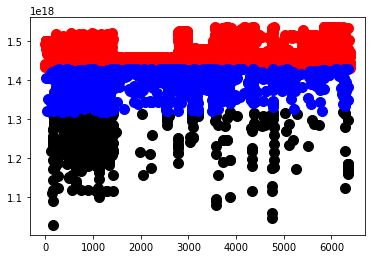

In [ ]:
columns = ['reviews.sourceURLs_code', 'reviews.date_int']
kmeans = KMeans(n_clusters=3)
kmeans.fit(ds[columns])

print(kmeans.cluster_centers_)

y_km = kmeans.fit_predict(ds[columns])
cluster_ds = ds[columns].to_numpy()

plt.scatter(cluster_ds[y_km ==0,0], cluster_ds[y_km == 0,1], s=100, c='red')
plt.scatter(cluster_ds[y_km ==1,0], cluster_ds[y_km == 1,1], s=100, c='black')
plt.scatter(cluster_ds[y_km ==2,0], cluster_ds[y_km == 2,1], s=100, c='blue')
plt.scatter(cluster_ds[y_km ==3,0], cluster_ds[y_km == 3,1], s=100, c='cyan')

Text(0.5, 1.0, 'Elbow curve')

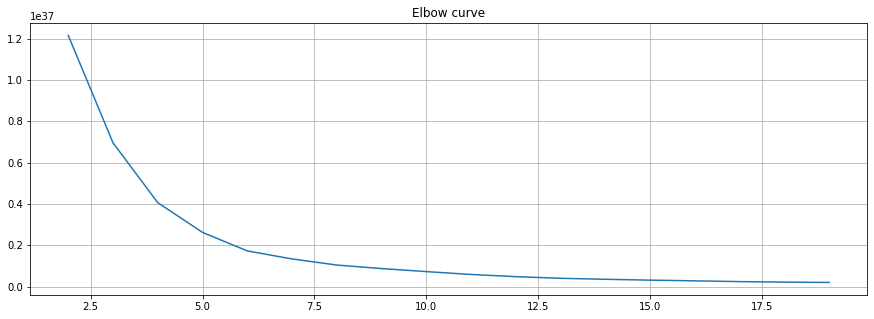

In [ ]:
columns = ['reviews.sourceURLs_code', 'reviews.date_int']
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(ds[columns])
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')